In [1]:
from IPython.display import display, Math, Latex
from sympy import integrate as sympy_integrate

alpha,beta = var("alpha,beta")
t = var("t")

assume(alpha>0)
assume(alpha-beta>0)

w = lambda t, beta : exp(2*beta*t)

Generalized_Laguerre_Rodrigues = lambda n, alpha, beta, t : (sqrt(2*alpha) / factorial(n) * exp((alpha-beta)*t) * diff(exp(-2*alpha*t)*t^n, t, n)).factor()

Q = lambda F, k, alpha, beta : sympy_integrate(F(t) * Generalized_Laguerre_Rodrigues(k,alpha,beta,t) * w(t, beta), (t, 0, Infinity))

def det_Q(F, n, alpha, beta):
    m = [[Q(F, n+k1-k2, alpha, beta) for k2 in range (n+1)] for k1 in range (n+1)]
    return matrix(SR, m)

# https://www.pythonpool.com/gaussian-elimination-python/

#gaussian elimination of M_Q in symbolic form
def gaussian_elimination(n, M_Q):
    rows = n
    cols = n
    ma = [[] for _ in range(n)]

    for i in range(rows):# row
        for j in range(cols): # col
            ma[i] += [M_Q[i][j]]

    for i in range(cols):
        row_to_change = -1
        #ii_abs = abs(ma[i][i].subs(digit_values).subs(k_z_sol).n())
        ii_abs = abs(ma[i][i].n())

        for r in range(i+1, rows):
            #ri_abs = abs(ma[r][i].subs(digit_values).subs(k_z_sol).n())
            ri_abs = abs(ma[r][i].n())
            if ri_abs > ii_abs:
                row_to_change = r
                cur_abs = ri_abs
                print("row_to_change", row_to_change)

        if row_to_change > -1:
            for col in range(i, cols):#+1):
                tmp = ma[i][col]
                ma[i][col] = ma[row_to_change][col]
                ma[row_to_change][col] = tmp

        for j in range(i+1, rows):
            ratio = ma[j][i]/ma[i][i]

            for k in range(cols):#+1):
                ma[j][k] = ma[j][k] - ratio * ma[i][k]

    # Формирование верхнетреугольной матрицы
    # RU - Right Upper
    M_RU = matrix(ma)
    return M_RU


In [2]:
R = lambda t : exp(-0.5*(t))

In [3]:
alpha_d = 2
beta_d = 1

n = 0

while(true):
    print("n", n)
    M_Q = det_Q(R, n, alpha_d, beta_d)
    print("M_Q", M_Q)
    det_M_Q = M_Q.det()
    print("det_M_Q", det_M_Q)
    M_Q_RU = gaussian_elimination(n+1, M_Q)
    display(Math(latex(M_Q_RU)))
    if abs(det_M_Q) < 1e-12:
        break
    n = n + 1
M_Q

n 0
M_Q [1.33333333333333]
det_M_Q 1.33333333333333


<IPython.core.display.Math object>

n 1
M_Q [-2.22222222222222  1.33333333333333]
[ 3.70370370370370 -2.22222222222222]
det_M_Q 7.99360577730113e-15
row_to_change 1


<IPython.core.display.Math object>

[-2.22222222222222  1.33333333333333]
[ 3.70370370370370 -2.22222222222222]

In [4]:
beta_i = []
for i in range(n+1):
    exec("beta_i_" + str(i) + "= var('beta_i_" + str(i) + "')")
    exec("beta_i += [beta_i_" + str(i) +"]")

alpha_i = []
for i in range(n):
    exec("alpha_i_" + str(i) + "= var('alpha_i_" + str(i) + "')")
    exec("alpha_i += [alpha_i_" + str(i) +"]")

beta1_i = []
for i in range(1, n+1):
    exec("beta1_i += [beta_i_" + str(i) +"]")

vbeta_i = vector(beta_i)
vbeta1_i = vector(beta1_i)

M_Q_RU_X = M_Q_RU*vbeta_i
M_Q_X = M_Q*vbeta_i

beta_i_0_d = 1

M_Q_RU_B = []
eq_sys_RU = []
for i in range(n+1):
    M_Q_RU_B_i = - (M_Q_RU_X[i]).coefficient(beta_i_0).n() * beta_i_0_d
    print(M_Q_RU_B_i)
    M_Q_RU_B += [M_Q_RU_B_i]
    eq_sys_RU += [M_Q_RU_X[i].subs(beta_i_0 == 0) == M_Q_RU_B_i]

print(eq_sys_RU)
    
M_Q_B = []
eq_sys = []
for i in range(n+1):
    M_Q_B_i = - (M_Q_X[i]).coefficient(beta_i_0).n() * beta_i_0_d
    print(M_Q_B_i)
    M_Q_B += [M_Q_B_i]
    eq_sys += [M_Q_X[i].subs(beta_i_0 == 0) == M_Q_B_i]

print(eq_sys)

def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

eq_sys_RU_M = GenerateMatrix(eq_sys_RU, vbeta1_i)
eq_sys_M = GenerateMatrix(eq_sys, vbeta1_i)

eq_sys_RU_M_sol = eq_sys_RU_M.solve_right(vector(M_Q_RU_B))
eq_sys_M_sol = eq_sys_M.solve_right(vector(M_Q_B))

coeffs_beta_i = [beta_i_0 == beta_i_0_d]
for i in range(n):
    eq_sys_RU_M_sol_i = eq_sys_RU_M_sol[i]
    print(eq_sys_RU_M_sol_i)
    coeffs_beta_i += [vbeta1_i[i] == eq_sys_RU_M_sol_i]

coeffs_beta_i = [beta_i_0 == beta_i_0_d]
for i in range(n):
    eq_sys_M_sol_i = eq_sys_M_sol[i]
    print(eq_sys_M_sol_i)
    coeffs_beta_i += [vbeta1_i[i] == eq_sys_M_sol_i]

print(coeffs_beta_i)
print(M_Q)

valpha_i = []
for i in range(n):
    alpha__i = 0
    print(i)
    for j in range(0,i+1):
        print(j, M_Q[0][n-j], i-j, beta_i[i-j])
        alpha__i += M_Q[0][n-j] * beta_i[i-j]
    alpha__i *= sqrt(2 * alpha)
    valpha_i += [alpha_i[i] == alpha__i]

print(valpha_i)

coeffs_alpha_i = []
for i in range(n):
    coeffs_alpha_i += [alpha_i[i] == valpha_i[i].rhs().subs(coeffs_beta_i).subs(alpha == alpha_d)]
print(coeffs_alpha_i)

-3.70370370370370
-0.000000000000000
[-2.22222222222222*beta_i_1 == -3.70370370370370, -(1.99840144432528e-15)*beta_i_1 == -0.000000000000000]
2.22222222222222
-3.70370370370370
[1.33333333333333*beta_i_1 == 2.22222222222222, -2.22222222222222*beta_i_1 == -3.70370370370370]
1.66666666666667
1.66666666666667
[beta_i_0 == 1, beta_i_1 == 1.66666666666667]
[-2.22222222222222  1.33333333333333]
[ 3.70370370370370 -2.22222222222222]
0
0 1.33333333333333 0 beta_i_0
[alpha_i_0 == 1.33333333333333*sqrt(2)*sqrt(alpha)*beta_i_0]
[alpha_i_0 == 2.66666666666666]


In [5]:
delta, S = var("delta, S")
F_delta = sum([alpha_i[i]*delta^i for i in range(n)])/sum([beta_i[i]*delta^i for i in range(n+1)])
F_delta_d = F_delta.subs(coeffs_alpha_i).subs(coeffs_beta_i)
F_delta_d_1_delta_2_alpha = (1 - delta)/(2*alpha)*F_delta_d
F_delta_d_1_delta_2_alpha_d = F_delta_d_1_delta_2_alpha.subs(alpha == alpha_d)
F_delta_d_1_delta_2_alpha_d

-0.666666666666665*(delta - 1)/(1.66666666666667*delta + 1)

In [6]:
F_S = F_delta_d_1_delta_2_alpha.subs(delta == (S - alpha + beta) / (S + alpha + beta)).factor()
F_S_d = F_S.subs(alpha == alpha_d, beta == beta_d)
rec_R = lambda t : inverse_laplace(F_S_d, S, t)
print(rec_R(t))
print(R(t))

391617358901775/391617358901776*e^(-1/2*t)
e^(-0.500000000000000*t)


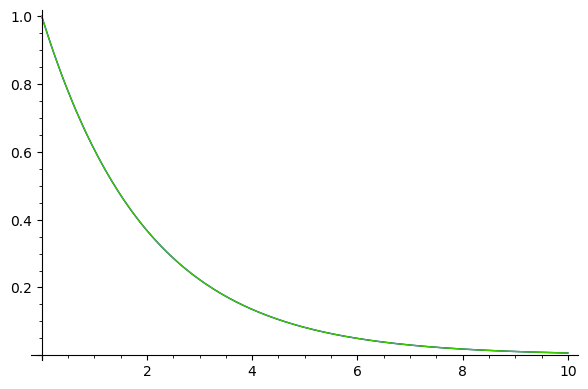

In [7]:
plot([rec_R(t), R(t)],(t, 0, 10))